<figure>
<IMG SRC="../../lectures/images/PhysicsLogo.jpg" WIDTH=100 ALIGN="right">
</figure>
# [Physics 411](http://jklymak.github.io/Phy411/) Time Series Analysis
*Jody Klymak*


# Assignment 7

### **Q1** Frequency-domain filtering

<div style='background:#F0F0F0'>  Consider a time series with a sharp jump in the middle as in the notes:
</div>

In [9]:
import numpy.random as random
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
%matplotlib nbagg

N=1001
dt=1.
t=np.arange(0,N*dt,dt)

x = np.cumsum(np.random.randn(N)) # red noise
f0=0.03 # Hz
x = x+ 40.*np.sin(f0*2*np.pi*t) # + sine wave
x=x-np.mean(x)
noise = 60.*np.random.randn(N)
xn = x+noise
xn[N/2:]=xn[N/2:]-2000.
# remove the mean!!
xn = xn-np.mean(xn)

<div style='background:#F0F0F0'>**1** Implement a low-pass filter of the data in the frequency domain, with a cutoff frequency of $f_c=0.06\ Hz$.</div>
   
  1. plot the signal and the smoothed signal (suggest zooming in on the step).
  2. plot the spectral response $|H(f)|$
  3. plot the phase response $\mathrm{angle}(H(f))$.

<div style='background:#F0F0F0'>
Be sure to comment on how good your filter is.
</div>

[-0.4995005 -0.4985015 -0.4975025 ...,  0.4975025  0.4985015  0.4995005]


<IPython.core.display.Javascript object>


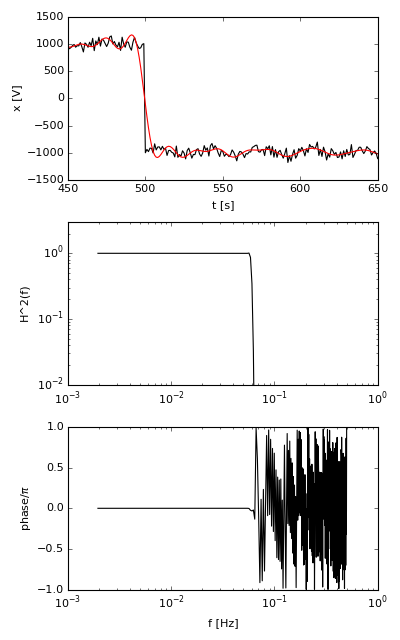

In [11]:
### BEGIN SOLUTION
f = np.arange(-(N-1)/2.,(N-1)/2.+1.)/N
print f
H = 0.*f
H[np.abs(f)<=0.06]=1.

X = np.fft.fft(xn)*np.fft.fftshift(H)
y = np.real(np.fft.ifft(X))
nfft=256*2
px,f = mlab.psd(xn,Fs=1.,NFFT=nfft,noverlap=nfft/2,window=mlab.window_hanning)
py,f = mlab.psd(y-np.mean(y),Fs=1.,NFFT=nfft,noverlap=nfft/2,window=mlab.window_hanning)
pxy,f=mlab.csd(xn,y-np.mean(y),Fs=1.,NFFT=nfft,noverlap=nfft/2,window=mlab.window_hanning)
fig,ax=plt.subplots(3,1,figsize=(5,8))
ax[0].plot(t,xn,'k',label='Orig.')
ax[0].plot(t,y,'r',label='Filtered')
ax[0].set_xlim([450,650]);ax[0].set_xlabel('t [s]');ax[0].set_ylabel('x [V]');ax[0].legend

ax[1].loglog(f,py/px,'k')
ax[1].set_ylim((0.01,3.))
ax[1].set_ylabel('H^2(f)');ax[2].semilogx(f,np.angle(pxy)/np.pi,'k');ax[2].set_xlabel('f [Hz]')
ax[2].set_ylabel('phase/$\pi$')
fig.tight_layout()
### END SOLUTION


COMMENT HERE:

<div style='background:#F0F0F0'>**2** Now repeat the above but apply a Hanning window to the frequency window *before* you apply it to the FFT of $x_n$.  Comment on how well the filter is doing when you do this.  (Its helpful to keep the previous result up)  (It is OK to use the `hanning` function)
</div>

<IPython.core.display.Javascript object>


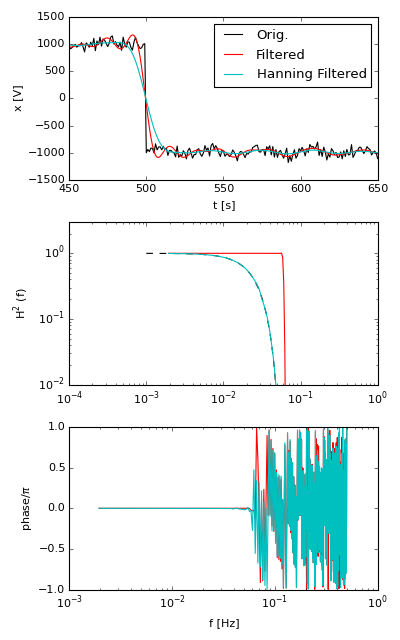

In [15]:
### BEGIN SOLUTION
ff = np.arange(-(N-1)/2.,(N-1)/2.+1.)/N
H = 0.*ff
fin=ff[np.abs(ff)<=0.06]
M=len(fin)
H[np.abs(ff)<=0.06]=np.hanning(M)

X = np.fft.fft(xn)*np.fft.fftshift(H)
yh = np.real(np.fft.ifft(X))
nfft=256*2
px,f = mlab.psd(xn,Fs=1.,NFFT=nfft,noverlap=nfft/2,window=mlab.window_hanning)
py,f = mlab.psd(y-np.mean(y),Fs=1.,NFFT=nfft,noverlap=nfft/2,window=mlab.window_hanning)
pyh,f = mlab.psd(yh-np.mean(yh),Fs=1.,NFFT=nfft,noverlap=nfft/2,window=mlab.window_hanning)
pxyh,f=mlab.csd(xn,yh-np.mean(yh),Fs=1.,NFFT=nfft,noverlap=nfft/2,window=mlab.window_hanning)
fig,ax=plt.subplots(3,1,figsize=(5,8))
ax[0].plot(t,xn,'k',label='Orig.')
ax[0].plot(t,y,'r',label='Filtered')
ax[0].plot(t,yh,'c',label='Hanning Filtered')
ax[0].set_xlim([450,650])
ax[0].set_xlabel('t [s]')
ax[0].set_ylabel('x [V]')
ax[0].legend()
ax[1].loglog(f,py/px,'r')
ax[1].loglog(ff,H**2,'k--')
ax[1].loglog(f,pyh/px,'c')
#ax[1].loglog(f,py,'r')
ax[1].set_ylim((0.01,3.))
ax[1].set_ylabel('$H^2(f)$')
ax[2].semilogx(f,np.angle(pxy)/np.pi,'r')
ax[2].semilogx(f,np.angle(pxyh)/np.pi,'c')
ax[2].set_xlabel('f [Hz]')
ax[2].set_ylabel('phase/$\pi$')
fig.tight_layout()
### END SOLUTION

COMMENT HERE

<div style='background:#F0F0F0'>**3** So the Hanning window falls off a *lot* earlier and more slowly than a step function, so adjust the cutoff frequency to get a reasonable filter that preserves the amplitude of the sine wave at $f=0.03\ \mathrm{Hz}$.  Comment on the pros and cons of this approach.  
</div>

<IPython.core.display.Javascript object>


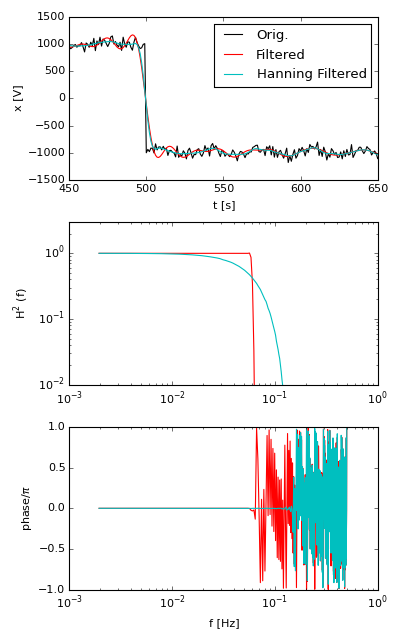

In [18]:
### BEGIN SOLUTION
ff = np.arange(-(N-1)/2.,(N-1)/2.+1.)/N
H = 0.*ff
fin=ff[np.abs(ff)<=0.06*2.5]
M=len(fin)
H[np.abs(ff)<=0.06*2.5]=np.hanning(M)
#H[np.abs(ff)<=0.06]=1.
#H = np.convolve(H,ones(41)/41,mode='same')

X = np.fft.fft(xn)*np.fft.fftshift(H)
yh = np.real(np.fft.ifft(X))
nfft=256*2
px,f = mlab.psd(xn,Fs=1.,NFFT=nfft,noverlap=nfft/2,window=mlab.window_hanning)
py,f = mlab.psd(y-np.mean(y),Fs=1.,NFFT=nfft,noverlap=nfft/2,window=mlab.window_hanning)
pyh,f = mlab.psd(yh-np.mean(yh),Fs=1.,NFFT=nfft,noverlap=nfft/2,window=mlab.window_hanning)
pxy,f=mlab.csd(xn,y-np.mean(y),Fs=1.,NFFT=nfft,noverlap=nfft/2,window=mlab.window_hanning)
pxyh,f=mlab.csd(xn,yh-np.mean(yh),Fs=1.,NFFT=nfft,noverlap=nfft/2,window=mlab.window_hanning)
fig,ax=plt.subplots(3,1,figsize=(5,8))
ax[0].plot(t,xn,'k',label='Orig.')
ax[0].plot(t,y,'r',label='Filtered')
ax[0].plot(t,yh,'c',label='Hanning Filtered')
ax[0].set_xlim([450,650])
ax[0].set_xlabel('t [s]')
ax[0].set_ylabel('x [V]')
ax[0].legend()
ax[1].loglog(f,py/px,'r')
ax[1].loglog(f,pyh/px,'c')
#ax[1].loglog(f,py,'r')
ax[1].set_ylim((0.01,3.))
ax[1].set_ylabel('$H^2(f)$')
ax[2].semilogx(f,np.angle(pxy)/np.pi,'r')
ax[2].semilogx(f,np.angle(pxyh)/np.pi,'c')
ax[2].set_xlabel('f [Hz]')
ax[2].set_ylabel('phase/$\pi$')
fig.tight_layout()
### END SOLUTION

COMMENT HERE

## Q2: Implementing a bandpass filter

<div style='background:#F0F0F0'>**1** Create a red-noise process with 20000 data points, $dt=1\ s$.  Using a **truncated Dirichlet Kernel**, create a **bandpass** filter centered at $f_c=0.1\ Hz$ that has a passband that is approximately 0.1 Hz wide. Choose a filter length that is long enough to accomodate 0.1 Hz. 
</div>

   1. Plot the unshifted and shifted filters versus $k$, the time index.
   2. Plot the spectra, the response function $H^2(f)$ and the phase response
   3. Comment on your bandpass and if it indeed passed the right frequencies.

HINT: when you make the Dirichlet Kernel filter make sure that the $k=0$ case is treated "correctly" because $sin(0)=0$ and you will get a discontinuity.  Calculate what $h_0$ should be from [L'Hôpital's_rule](http://en.wikipedia.org/wiki/L'Hôpital's_rule).

40.0
0.10005
[ nan]


/Users/jklymak/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:15: RuntimeWarning: invalid value encountered in divide
/Users/jklymak/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:18: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/jklymak/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:19: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


<IPython.core.display.Javascript object>


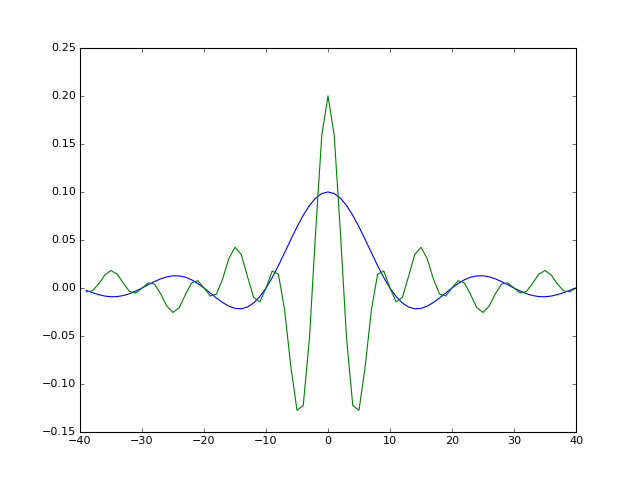

In [23]:
N=20000
t = np.arange(N*1.)
x = np.cumsum(np.random.randn(N))
x=x-np.mean(x)
### BEGIN SOLUTION

# use a dirchlet low pass from notes:
fb = 0.05
K = 2/fb
print K
fs=1.
M = 2.*fb/fs*N+1.
print M/N
k = np.array(range(-N/2+1,N/2))
h2 = (1./N)*np.sin(np.pi*(k)*M/N)/np.sin(np.pi*(k)/N)
print h2[k==0.]
h2[k==0]=(M/N)
h2 = h2[(N/2-K):(N/2+K)]
k = k[(N/2-K):(N/2+K)]

fig,ax=plt.subplots()
ax.plot(k,h2)
#xlim([-100,200])
# now shift:
fc = 0.1
mc = fc*N
hband = h2*np.cos(2*k*mc*np.pi/N)*2.
ax.plot(k,hband)
### END SOLUTION

[ 1.59390772  5.55670329  7.40612246 ...,  3.24120469  2.85528142
  1.43143696]
20000


<IPython.core.display.Javascript object>


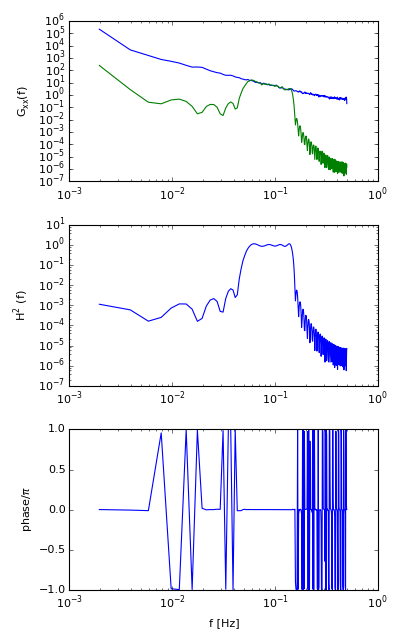

In [24]:
### BEGIN SOLUTION
import scipy.signal as signal
xb = np.convolve(x,hband,mode='same')
print xb
xb=xb-np.mean(xb)
nfft=256*2
print len(xb)
px,f = mlab.psd(x,Fs=1.,NFFT=nfft,noverlap=nfft/2)
pxb,f = mlab.psd(xb,Fs=1.,NFFT=nfft,noverlap=nfft/2)
pxxb,f = mlab.csd(x,xb,Fs=1.,NFFT=nfft,noverlap=nfft/2)
fig,ax=plt.subplots(3,1,figsize=(5,8))
ax[0].loglog(f,px,label='orig')
ax[0].loglog(f,pxb,label='bandpass')
ax[0].set_ylabel('$G_{xx}(f)$')
ax[1].loglog(f,pxb/px)
ax[1].set_ylabel('$H^2(f)$')
ax[2].semilogx(f,np.angle(pxxb)/np.pi)
ax[2].set_xlabel('f [Hz]')
ax[2].set_ylabel('phase/$\pi$')
fig.tight_layout()
### END SOLUTION

COMMENT

## Q3: Bandpass the weather data

In [26]:
minutedata=np.genfromtxt('http://web.uvic.ca/~jklymak/Phy411/Data/MinuteData/DeepCoveNew.txt')[:,1]

dc=minutedata[np.isfinite(minutedata)]
import scipy.signal as signal

<p><div style='background:#F0F0F0'>
**1** Using `signal.filtfilt` and suitable  "elliptical" filters band-pass the daily signal from the minute-data from Deep Cove.  Plot the power spectrum of the unfiltered and filtered signals. </div>
</p>
<p>
<div style='background:#F0F0F0'>
HINT: Do a high pass and low pass.  Design using `ellipord` and `ellip`.  These functions allow you to try and design a bandpass directly, but I could not get it to work.  Do not be too draconian in your passband - i.e. make it relatively broad, but do try and suppress the peaks.  I found it easier to think in terms of "hours" rather than frequencies, but you can do it as frequencies as well.
</div>
</p>

In [27]:
### BEGIN SOLUTION
# the data is 1/minute. We want to filter between 20 h and 28 h so 
# we want to filter at 24 h or f0=1./60./24., of f0/fs=1./24. or f0/fN=1./48, 
#so Wn = 1/2/20 to 1/2/28 is a band pass between 20 and 28 h.
passband = [48,20] # hours
stopband = [40,15] # hours

#Elliptical:
N,Wn=signal.ellipord([2./stopband[0]/60.],[2./passband[0]/60.],  1., 35., analog=False)
print Wn
print N
b,a=signal.ellip(N=N,rp=1.,rs=35.,Wn=Wn,btype='high')
dcellip=signal.lfilter(b,a,dc-np.mean(dc))

# lowpass
N,Wn=signal.ellipord([2./passband[1]/60.],[2./stopband[1]/60.],  1., 35., analog=False)

b,a=signal.ellip(N=N,rp=1.,rs=35.,Wn=Wn,btype='low')
dcellip=signal.lfilter(b,a,dcellip-np.mean(dcellip))
### END SOLUTION

0.000833333333333
5


<IPython.core.display.Javascript object>


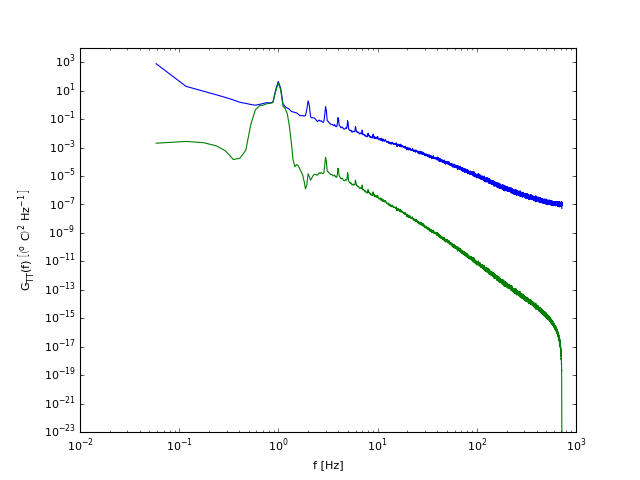

In [34]:
### BEGIN SOLUTION
nfft=2048*12
pdc,f=mlab.psd(dc,Fs=24*60,NFFT=nfft,noverlap=nfft/2)
pdcellip,f=mlab.psd(dcellip,Fs=24*60,NFFT=nfft,noverlap=nfft/2)
fig,ax = plt.subplots()
ax.loglog(f,pdc,f,pdcellip)
ax.set_xlabel('f [Hz]')
ax.set_ylabel(r'$G_{TT}(f)\ \left[ \left(^o C\right)^2 Hz^{-1}\right]$')
### END SOLUTION

<div style='background:#F0F0F0'> **2** Using your band passed signal, plot the *amplitude* of the daily cycle as a function of time, smoothed over a suitable time period. Compare with the raw timeseries to make sure your amplitudes make sense. Comment on the annual variation in the daily amplitude and if it makes sense with respect to the seasons.
</div>

4 6.94444444444e-05


<IPython.core.display.Javascript object>


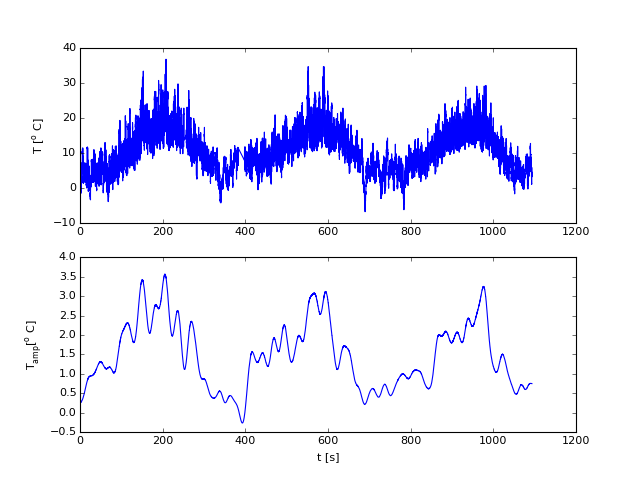

In [36]:
### BEGIN SOLUTION

# Get the amplitude:
dcamp = np.abs(dcellip)
# smooth to two weeks:

N,Wn=signal.ellipord([2./24/20./60.],[2./24./27./60.],  1., 25., analog=False)
print N,Wn
b,a=signal.ellip(N=N,rp=1.,rs=25.,Wn=Wn,btype='low')
mm=np.mean(dcamp)
dcampsm= signal.filtfilt(b,a,dcamp-mm)+mm
t = np.arange(0,len(dcampsm))
t = t/60./24. # get into days
fig,ax=plt.subplots(2,1)
ax[0].plot(t,dc)
ax[0].set_ylabel('$T\ [^oC]$')
ax[1].plot(t,dcampsm)
ax[1].set_xlabel('t [s]')
ax[1].set_ylabel('$T_{amp} [^oC]$')

### END SOLUTION

COMMENT HERE